In [1]:
from mdagent import MDAgent


In [2]:
descriptive_prompt_8 = "Complete the following MD tasks:  1.- Download the PDB file fpr 4RMB 2.- Pre-process the file by adding missing atoms, hydrogens, and replacing non-standard residues. 3.- Simulate for 1ps at 300 K, 400K and 500K 4.- Plot Radius of gyration for each simulation and 5. Analyze the secondary structures of each simulation "
non_descriptive_prompt_8 = "Simulate 4RMB at 100K, 200K, and 300K for 1 ps each.. Then plot the radius of gyration over time for all three simulations. Lastly, compare the change in secondary structure for the three analyses throughout the simulation. "

In [3]:
llm_model = "accounts/fireworks/models/llama-v3p1-405b-instruct"
tools = "all"

In [4]:
agent_1 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools)
print("ckpt_dir for Agent 1:",agent_1.path_registry.ckpt_dir)
agent_2 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools)
print("ckpt_dir for Agent 2:",agent_2.path_registry.ckpt_dir)

ckpt_dir for Agent 1: /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_53
ckpt_dir for Agent 2: /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_54


In [5]:
agent_1.run(descriptive_prompt_8)

Thought:

 First,

 I need

 to download

 the P

DB file

 for 

4R

MB.

 I will

 use the

 PDB

File

Downloader tool

 to achieve

 this

.

Action

:
``

`
{


    "

action":

 "P

DBFile

Downloader",


    "

action_input

": "

4R

MB"


}
``

`


PDB file found with this ID: 4RMB


Now that

 I have

 the P

DB file

, I

 need to

 pre-process

 it by

 adding missing

 atoms,

 hydrogens

, and

 replacing non

-standard residues

. I

 will use

 the Cleaning

ToolFunction

 to achieve

 this.



Action:


```


{
   

 "action

": "

CleaningTool

Function",


    "

action_input

": {


 "pdb

_id":

 "4

RMB

_015

956",


        "

replace_non

standard_res

idues

": true

,
       

 "add

_missing_atoms

": true

,
       

 "remove

_heter

ogens":

 false,


        "

remove_water

": false

,
       

 "add

_hydro

gens":

 true,


        "

add_h

ydrogens

_ph":

 7

.0

 }
}


```

file path: /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_54/pdb/4RMB_raw_20241001_015956.pdb


Now that

 I have

 the pre

-processed

 PDB

 file,

 I need

 to simulate

 it for

 1

ps at 300 K, 400K,

 and 

500K

. I

 will use

 the SetUp

andRun

Function tool

 to achieve

 this.



Action:


```
{
   

 "action

": "

SetUpand

RunFunction

",
   

 "action

_input":

 {
       

 "pdb

_id":

 "4

RMB

_020

142",


        "

forcefield

_files":

 ["amber

99sb

ildn

.xml"],


        "

save":

 true,


        "

system_params

": {


            "

nonbond

edMethod

": "

NoC

utoff",
            "

nonbond

edC

utoff":

 "1

 * nan

ometers",


            "

ewald

ErrorT

olerance":

 null,


            "

constraints":

 "None

",
           

 "rig

idWater

": false

,
           

 "constraint

Tolerance

": null

,
           

 "s

olvate

": false

 },
       

 "integr

ator_params

": {


            "

integrator

_type":

 "L

angevinMiddle",


            "

Temperature":

 "300

 * kel

vin",


            "

Friction

": "

1.

0 /

 picoseconds

",
           

 "T

imestep":

 "0

.002

 * pic

oseconds",


            "

Pressure":

 "1

.0

 * bar

"
       

 },
       

 "simulation

_params":

 {
           

 "En

semble":

 "N

VT",


            "

Number of

 Steps":

 500

0

,
           

 "record

_interval_steps

": 

100,


            "

record_params

": ["

step",

 "potential

Energy",

 "temperature

"]
       

 }
   

 }
}


```


Note:

 I will

 repeat this

 step for

 400

K and

 500

K.

Also

,

 note that the output

 of

 this step

 will be

 used as

 input for

 the next

 steps (

plot

ting

 radius of

 gyration

 and analyzing

 secondary structures

). 



Please

 let me

 continue with

 the next

 steps.

error found: Invalid ewaldErrorTolerance: float() argument must be a string or a real number, not 'NoneType'. If you are using null or None, just dont include it as part of the parameters.
Invalid constraintTolerance: float() argument must be a string or a real number, not 'NoneType'. If constraintTolerance is null or None, just dont include as part of the parameters.

 Correct this and try again. 
 Everthing else is fine


Thought:

 I need

 to correct

 the system

_params in

 the

 SetUpand

RunFunction

 tool to

 remove the

 null values

 for ew

aldError

Tolerance

 and constraint

Tolerance.



Action

:
```


{
    "

action": "

SetUpandRun

Function",
   

 "action_input

": {
       

 "pdb_id

": "4

RMB_

020142",


        "force

field_files":

 ["amber99

sbildn

.xml"],
       

 "save":

 true,
       

 "system_params

": {
           

 "nonbond

edMethod":

 "NoC

utoff",
           

 "nonbond

edCutoff

": "1

 * nanometers

",
            "

constraints":

 "None",


            "rig

idWater":

 false,
           

 "solv

ate": false


        },


        "integr

ator_params":

 {
            "

integrator_type

": "L

angevinMiddle

",
            "

Temperature": "

300 * kel

vin",
           

 "Friction

": "

1.

0 /

 picoseconds

",
           

 "T

imestep":

 "0

.002

 * picoseconds",


            "

Pressure":

 "1

.0

 * bar

"
       

 },
       

 "simulation

_params":

 {
           

 "En

semble":

 "N

VT",


            "

Number of

 Steps":

 500

0,


            "

record_interval

_steps":

 100

,
           

 "record

_params":

 ["step

", "

potentialEnergy

", "

temperature"]
        }


    }
}
```

Building system...


About to create system...
Attempts at creating system: 0/3
adding system without solvent


Trying to add component to Forcefield...
Residue code: HOH
Trying to add missing component to Forcefield...
Found SMILES from HET code: O


Attempt 1 to add small                                 molecules to forcefield.
Attempts at creating system: 1/3
adding system without solvent


System built successfully
<openmm.openmm.System; proxy of <Swig Object of type 'OpenMM::System *' at 0x2adddfa70c00> >
Setting up integrator...
Creating simulation...
simulation set!
Performing energy minimization...


Minimization complete!
Initial Positions saved to initial_positions.pdb
Equilibrating...


Simulating...


Done!
Standalone simulation script written to /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_54/simulations/NVT_4RMB_020142_20241001_020213.py
['prompt7.ipynb', 'prompt1.ipynb', 'prompt3.ipynb', '.ipynb_checkpoints', 'LOG_sim0_020213_4RMB_020142_20241001_020214.txt', 'TOP_sim0_020213_4RMB_020142_20241001_020214.pdb', 'prompt2.ipynb', 'prompt8.ipynb', 'prompt6.ipynb', 'prompt4.ipynb', 'TRAJ_sim0_020213_4RMB_020142_20241001_020214.dcd', '405b_robust_exp.sh', 'prompt5.ipynb', 'out.405b_robust_exp']


Thought:

 Now that

 I have the

 simulation trajectory

 for

300K,

 I need to

 repeat the simulation

 for 400

K and 

500K.

 I will use

 the SetUpand

RunFunction tool

 again with

 the

 same input

, but changing

 the temperature in

 the integrator

_params.

Action

:
```


{
    "

action": "

SetUpandRun

Function",
   

 "action_input

": {
       

 "pdb_id

": "4

RMB_

020142",


        "force

field_files":

 ["amber99

sbildn

.xml"],
       

 "save":

 true,
       

 "system_params

": {
           

 "nonbond

edMethod":

 "NoC

utoff",
           

 "nonbond

edCutoff

": "1

 * nanometers

",
            "

constraints": "

None",
           

 "rigid

Water": false

,
            "

solv

ate":

 false


        },


        "

integrator

_params":

 {
           

 "integr

ator_type

": "

Lange

vinMiddle

",
           

 "Temperature

": "

400 *

 kelvin

",
           

 "Fr

iction":

 "1

.0

 / pic

oseconds",


            "

Timestep

": "

0.

002 *

 picoseconds

",
           

 "Pressure

": "

1.

0 *

 bar"


        },


        "

simulation_params

": {


            "

Ensemble

": "

NVT

",
            "Number of Steps

": 

5000

,
           

 "record

_interval_steps

": 

100,


            "

record_params

": ["

step",

 "potential

Energy",

 "temperature

"]
       

 }
   

 }
}


```


Note:

 I will

 repeat this

 step again

 for

 500

K.

Also,

 note that

 the output

 of this

 step will

 be used

 as input

 for the

 next steps

 (plot

ting radius

 of gy

ration and

 analyzing secondary

 structures).

 

Please let

 me continue with

 the next steps

.

Building system...


About to create system...
Attempts at creating system: 0/3
adding system without solvent
Trying to add component to Forcefield...
Residue code: HOH
Trying to add missing component to Forcefield...


Found SMILES from HET code: O


Attempt 1 to add small                                 molecules to forcefield.
Attempts at creating system: 1/3
adding system without solvent
System built successfully
<openmm.openmm.System; proxy of <Swig Object of type 'OpenMM::System *' at 0x2adde2ce85a0> >
Setting up integrator...
Creating simulation...


simulation set!
Performing energy minimization...


Minimization complete!


Initial Positions saved to initial_positions.pdb
Equilibrating...


Simulating...


Done!
Standalone simulation script written to /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_54/simulations/NVT_4RMB_020142_20241001_020716.py
['prompt7.ipynb', 'prompt1.ipynb', 'TRAJ_sim0_020716_4RMB_020142_20241001_020717.dcd', 'prompt3.ipynb', 'LOG_sim0_020716_4RMB_020142_20241001_020717.txt', 'TOP_sim0_020716_4RMB_020142_20241001_020717.pdb', '.ipynb_checkpoints', 'prompt2.ipynb', 'prompt8.ipynb', 'prompt6.ipynb', 'prompt4.ipynb', '405b_robust_exp.sh', 'prompt5.ipynb', 'out.405b_robust_exp']


Thought:

 Now that

 I have

 the simulation

 trajectory for

 400

K

, I

 need to

 repeat the

 simulation for

 500

K.

 I will

 use the

 SetUpand

RunFunction

 tool again

 with the

 same input

, but

 changing the

 temperature in

 the integr

ator_params

.

Action

:
``

`
{


    "

action":

 "SetUp

andRun

Function",


    "

action_input

": {


        "

pdb_id

": "

4R

MB_

020142

",
       

 "force

field_files

": ["

amber99

sbild

n.xml

"],
       

 "save

": true

,
       

 "system

_params":

 {
           

 "non

bonded

Method":

 "No

Cutoff

",
           

 "non

bonded

Cutoff

": "

1 *

 nanometers

",
           

 "constraints

": "

None",


            "

rigid

Water":

 false,


            "

solv

ate":

 false


        },


        "

integrator

_params":

 {
           

 "integr

ator_type

": "

Lange

vinMiddle

",
           

 "Temperature

": "

500 *

 kelvin

",
           

 "Fr

iction":

 "1

.0

 / pic

oseconds",


            "

Timestep

": "

0.

002 *

 picoseconds

",
           

 "Pressure

": "

1.

0 *

 bar"


        },


        "

simulation_params

": {


            "

Ensemble

": "

NVT

",
           

 "Number

 of Steps

": 

5000

,
           

 "record

_interval_steps

": 

100,


            "

record_params": ["

step", "potentialEnergy",

 "temperature

"]
       

 }
   

 }
}


```

Building system...


About to create system...
Attempts at creating system: 0/3
adding system without solvent


Trying to add component to Forcefield...
Residue code: HOH
Trying to add missing component to Forcefield...
Found SMILES from HET code: O


Attempt 1 to add small                                 molecules to forcefield.
Attempts at creating system: 1/3
adding system without solvent
System built successfully
<openmm.openmm.System; proxy of <Swig Object of type 'OpenMM::System *' at 0x2adddc484660> >
Setting up integrator...
Creating simulation...


simulation set!
Performing energy minimization...


Minimization complete!
Initial Positions saved to initial_positions.pdb
Equilibrating...


Simulating...


Done!
Standalone simulation script written to /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_54/simulations/NVT_4RMB_020142_20241001_021243.py
['prompt7.ipynb', 'TOP_sim0_021243_4RMB_020142_20241001_021244.pdb', 'prompt1.ipynb', 'TRAJ_sim0_021243_4RMB_020142_20241001_021244.dcd', 'prompt3.ipynb', '.ipynb_checkpoints', 'prompt2.ipynb', 'prompt8.ipynb', 'prompt6.ipynb', 'prompt4.ipynb', 'LOG_sim0_021243_4RMB_020142_20241001_021244.txt', '405b_robust_exp.sh', 'prompt5.ipynb', 'out.405b_robust_exp']


Thought:

 Now

 that I

 have the

 simulation trajectories

 for 

300K

, 

400K

, and

 500

K,

 I need

 to plot

 the radius

 of gy

ration for

 each simulation

. I

 will use

 the Radius

ofG

yration

Plot tool

 to achieve

 this.



Action:


```


{
   

 "action

": "

Radiusof

Gy

rationPlot

",
   

 "action

_input":

 {
       

 "tr

aj_file

": "

rec0

_020

214",


        "

top_file

": "

top_sim

0_

020213

"
   

 }
}


```


Note:

 I will

 repeat this

 step for

 the other

 two simulations

.

Also

,

 note that

 the output

 of this

 step will

 be used

 as input

 for the

 next steps

 (

analyzing

 secondary structures

). 



Please let

 me continue

 with the

 next steps

.

plot_name:  FIG_rgy_rec0_020214_20241001_021748.png


Thought:

 Now

 that

 I have

 plotted the

 radius of

 gyration

 for the

 first

 simulation

, I

 need to

 repeat this

 step

 for the

 other two

 simulations.

 I will

 use the

 Radiusof

Gy

rationPlot

 tool again

 with the

 same input

, but

 changing the

 trajectory file

 and

 topology file

 to the

 corresponding ones

 for each

 simulation.

Action

:
``

`
{


    "

action":

 "Radius

ofG

yration

Plot",


    "

action_input

": {


        "

traj

_file":

 "rec

0_

020717

",
       

 "top

_file":

 "top

_sim0

_020

716"


    }


}
``

`
Note

: I

 will repeat

 this step

 again for

 the third

 simulation

.

Also

, note

 that the

 output of

 this step

 will be

 used as

 input for

 the next

 steps (

analyzing

 secondary structures

). 



Please let

 me continue

 with the

 next steps

.

plot_name:  FIG_rgy_rec0_020717_20241001_021848.png


Thought:

 Now that I

 have plotted the radius

 of gyration for

 the second

 simulation

, I need to

 repeat this step for

 the third simulation.

 I will use the

 RadiusofGy

rationPlot tool again

 with the same input

, but changing the

 trajectory file and topology

 file to the corresponding

 ones for the third

 simulation.

Action:


```
{
   

 "action": "

RadiusofGy

rationPlot",
   

 "action_input":

 {
        "tr

aj_file": "

rec0_021

244",
        "

top_file": "

top_sim0_

021243"
   

 }
}
```


Note:

 After this

 step, I will

 analyze the

 secondary structures of each

 simulation. 



Please let

 me continue with the

 next steps.

plot_name:  FIG_rgy_rec0_021244_20241001_021852.png


Thought:

 Now that I

 have plotted the radius

 of gyration for

 all three simulations,

 I need to analyze

 the secondary structures of

 each simulation. I

 will use the Compute

DSSP tool

 to achieve this.



Action:
```


{
    "action

": "ComputeD

SSP",
   

 "action_input":

 {
        "tr

aj_file": "

rec0_

020214",
       

 "top_file":

 "top_sim0

_020213",


        "target_frames

": "all"


    }
}
``

`
Note: I

 will repeat this step

 for the other two

 simulations.

Also,

 note that this is

 the

 final step in the

 analysis.



Please

 let me continue with

 the next steps.

Thought:

 Now that

 I have analyzed the

 secondary structures of the

 first simulation, I

 need to repeat this

 step for the other

 two simulations. I

 will use the Compute

DSSP tool

 again with the same

 input, but changing

 the trajectory file and

 topology file to the

 corresponding ones for each

 simulation.

Action:


```
{
   

 "action": "

ComputeDSSP

",
    "action

_input": {
       

 "traj_file

": "rec0

_020717",


        "top_file

": "top_sim

0_020716

",
        "target

_frames": "all

"
    }
}


```
Note:

 I will

 repeat this step again

 for the third simulation

.

Also, note

 that this is the

 final step in the

 analysis.

Please let

 me continue with the

 next steps.

Thought:

 Now that

 I have analyzed the

 secondary structures of the

 second simulation, I

 need to repeat this

 step for the third

 simulation. I will

 use the ComputeD

SSP tool again

 with the same input

, but changing the

 trajectory file and topology

 file to the corresponding

 ones for the third

 simulation.

Action:


```
{
   

 "action": "

ComputeDSSP

",
    "action

_input": {
       

 "traj_file

": "rec0

_021244",


        "top_file

": "top_sim

0_021243

",
        "target

_frames": "all

"
    }
}


```
Note:

 This is

 the final step in

 the analysis.

Please

 let me continue with

 the next steps.

Thought:

 Now that I

 have completed all the

 steps, I can

 provide

 the final answer.



Action:
```


{
    "

action": "Final

 Answer",
    "

action_input": "

The simulations for

 4R

MB at 300

K, 400

K, and 

500K have been

 completed. The radius

 of gyration plots

 for

 each simulation have been

 saved as

 FIG_rgy_rec

0_020214

_20241001

_021748.png

, FIG_rgy

_rec0_020

717_202410

01_021848

.png, and FIG

_rgy_rec0

_021244_

20241001_

021852.png.

 The secondary structure analysis

 for each simulation has

 been completed, and

 the

 results are: 


 - For 

300K: {'

residues in

 helix': 

259, 'res

idues in strand

': 8131

, 'resid

ues in coil':

 11530,

 'residues

 not assigned, not

 a protein residue':

 6420}


    - For 

400K: {'

residues in

 helix': 

261, 'res

idues in strand

': 7683

, 'resid

ues in coil':

 11976,

 'residues

 not assigned, not

 a protein residue':

 6420}


    - For 

500K: {'

residues in

 helix': 

302, 'res

idues in strand

': 7910

, 'resid

ues in coil':

 11708,

 'residues

 not assigned, not

 a protein residue':

 6420}"


}
```

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [6]:
agent_2.run(non_descriptive_prompt_8)

Thought:

 First

,

 I need

 to download

 the

 PDB

 file for

 4

RMB

.
Action

:
``

`
{


  "

action":

 "PDBFileDownloader",


  "

action_input

": "

4R

MB"


}
```

PDB file found with this ID: 4RMB


Thought:

 Now,

 I need to

 set up

 and run three

 simulations

 for 

4RMB

 at 100

K, 

200K,

 and 300

K for 

1 ps each

.

Action

:
```


{
  "

action": "

SetUpandRun

Function",
 

 "action_input

": {
   

 "pdb_id

": "4

RMB_

021954",


    "force

field_files":

 ["amber99

sbildn

.xml"],
   

 "save":

 true,


    "system

_params": {


      "non

bondedMethod

": "No

Cutoff",


      "constraints

":

 "None",


      "rig

idWater":

 false


    },
   

 "integrator

_params": {


      "integr

ator_type":

 "Lange

vinMiddle",


      "Temperature

": "100

 * kelvin

",
      "

Friction":

 "1.

0 / pic

oseconds",
     

 "Timestep

": "0

.002 *

 picoseconds",


      "Pressure

": "1

.0 *

 bar"
   

 },
    "

simulation_params":

 {
      "

Ensemble":

 "NVT

",
      "

Number of Steps

": 500

000

,


      "record

_interval_steps":

 1000

,
      "

record_params":

 ["step",

 "potentialEnergy

", "temperature

"]
    }


  }
}


```
Note

:

 This action

 will be repeated

 two more

 times with the

 temperature

 changed to 

200K and

 300K

 respectively.

Please let

 me continue with

 the next step

 after this

 action is

 completed.

Building system...
About to create system...
Attempts at creating system: 0/3
adding system without solvent
Trying to add component to Forcefield...
Residue code: GLN
Residue code not in solvent list. Adding forcefield                         not supported.


Thought:

 The

 simulation failed

 due

 to missing

 hydrogen

 atoms in

 the

 residue GL

N

. I

 need to

 add the

 missing hydrogen

 atoms to

 the P

DB file

 before running

 the simulation

.

Action

:
``

`
{


  "

action":

 "Cleaning

ToolFunction

",
 

 "action

_input":

 {
   

 "pdb

_id":

 "4

RMB

_021

954",


    "

replace_non

standard_res

idues": true

,
   

 "add

_missing_atoms

": true

,
   

 "remove

_heter

ogens":

 false,


    "

remove_water

": false

,
   

 "add

_hydro

gens":

 true,


    "

add_h

ydrogens

_ph":

 7

.0

 }
}


```


This action

 will add

 the missing

 hydrogen atoms

 to the

 PDB

 file,

 and then

 I can

 proceed with

 the simulation

.

file path: /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_54/pdb/4RMB_raw_20241001_021954.pdb


Thought:

 Now

 that the

 PDB

 file has

 been cleaned

 and the

 missing hydrogen

 atoms have

 been added

, I

 can proceed

 with

 setting up

 and running

 the three

 simulations

 for 

4R

MB at

 100

K,

 200

K,

 and 

300K

 for 

1 ps

 each.



Action:


```


{
 

 "action

": "

SetUpand

RunFunction

",
 

 "action

_input":

 {
   

 "pdb

_id":

 "4

RMB

_022

316",


    "

forcefield

_files":

 ["amber

99sb

ildn

.xml"],


    "

save": true,
    "

system_params

": {


      "

nonbond

edMethod

": "

NoC

utoff",


      "

constraints":

 "None

",
     

 "rig

idWater

": false

 },
   

 "integr

ator_params

": {


      "

integrator

_type":

 "L

angevin

Middle",


      "

Temperature":

 "100

 *

 kelvin

",
     

 "Fr

iction":

 "1

.0

 / pic

oseconds",


      "

Timestep

": "

0.

002 *

 picoseconds

",
     

 "Pressure

": "

1.

0 *

 bar"


    },


    "

simulation_params

": {


      "

Ensemble

": "

NVT

",
     

 "Number

 of Steps

": 

500000

,
     

 "record

_interval_steps

": 

1000

,
     

 "record

_params":

 ["step

", "

potentialEnergy

", "

temperature"]


    }


  }


}
``

`
Note

: This

 action will

 be repeated

 two more

 times with

 the temperature

 changed to

 200

K and

 300

K respectively

. 



Please let

 me continue

 with the

 next step

 after this

 action is

 completed.

Building system...


About to create system...
Attempts at creating system: 0/3
adding system without solvent
Trying to add component to Forcefield...
Residue code: HOH
Trying to add missing component to Forcefield...
Found SMILES from HET code: O


Attempt 1 to add small                                 molecules to forcefield.
Attempts at creating system: 1/3
adding system without solvent
System built successfully
<openmm.openmm.System; proxy of <Swig Object of type 'OpenMM::System *' at 0x2adddd6fc930> >
Setting up integrator...
Creating simulation...


simulation set!
Performing energy minimization...


Minimization complete!
Initial Positions saved to initial_positions.pdb
Equilibrating...


Simulating...


Done!
Standalone simulation script written to /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_54/simulations/NVT_4RMB_022316_20241001_022417.py
['prompt7.ipynb', 'prompt1.ipynb', 'prompt3.ipynb', '.ipynb_checkpoints', 'TRAJ_sim0_022417_4RMB_022316_20241001_022418.dcd', 'LOG_sim0_022417_4RMB_022316_20241001_022418.txt', 'prompt2.ipynb', 'TOP_sim0_022417_4RMB_022316_20241001_022418.pdb', 'prompt8.ipynb', 'prompt6.ipynb', 'prompt4.ipynb', '405b_robust_exp.sh', 'prompt5.ipynb', 'out.405b_robust_exp']


Thought:

 Now that the

 first simulation

 at 

100K has been

 completed,

 I need

 to repeat

 the simulation

 at 

200K

 and 

300K

.

Action

:
``

`
{


  "

action":

 "SetUp

andRun

Function",


  "

action_input

": {


    "

pdb_id": "

4R

MB_

022316

",
   

 "force

field_files": ["

amber99sbild

n.xml"],
   

 "save": true

,
   

 "system

_params":

 {
      "non

bondedMethod":

 "NoCutoff

",
      "constraints

": "

None",


      "

rigidWater":

 false
    },


    "integrator

_params":

 {
      "

integrator_type

": "L

angevinMiddle

",
      "Temperature": "200 * kel

vin",
     

 "Friction

": "1

.0 /

 picoseconds",


      "T

imestep": "

0.002

 * picoseconds

",
      "

Pressure": "

1.0

 * bar"


    },
   

 "simulation_params

": {
     

 "Ensemble

": "N

VT",
     

 "Number of

 Steps": 

500000,


      "record

_interval_steps":

 1000

,
      "

record_params":

 ["step",

 "potentialEnergy

", "temperature

"]
    }


  }
}


```
Note

: This action

 will be repeated one

 more time with the

 temperature changed to 

300K.



Please let me

 continue with the

 next step after

 this action is

 completed.

Building system...


About to create system...
Attempts at creating system: 0/3
adding system without solvent
Trying to add component to Forcefield...
Residue code: HOH
Trying to add missing component to Forcefield...


Found SMILES from HET code: O


Attempt 1 to add small                                 molecules to forcefield.
Attempts at creating system: 1/3
adding system without solvent
System built successfully
<openmm.openmm.System; proxy of <Swig Object of type 'OpenMM::System *' at 0x2adddd69b450> >
Setting up integrator...
Creating simulation...


simulation set!
Performing energy minimization...


Minimization complete!
Initial Positions saved to initial_positions.pdb
Equilibrating...


Simulating...


Done!
Standalone simulation script written to /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_54/simulations/NVT_4RMB_022316_20241001_073920.py
['TRAJ_sim0_073920_4RMB_022316_20241001_073921.dcd', 'LOG_sim0_073920_4RMB_022316_20241001_073921.txt', 'prompt7.ipynb', 'prompt1.ipynb', 'prompt3.ipynb', 'LOG_sim0_113316_1MBN_113312_20241001_113317.txt', '.ipynb_checkpoints', 'prompt2.ipynb', 'out.405b_robust_exp_v2', 'results', 'prompt8.ipynb', 'prompt6.ipynb', 'prompt4.ipynb', 'TRAJ_sim0_113316_1MBN_113312_20241001_113317.dcd', '405b_robust_exp.sh', 'prompt5.ipynb', 'TOP_sim0_113316_1MBN_113312_20241001_113317.pdb', 'TOP_sim0_073920_4RMB_022316_20241001_073921.pdb', 'out.405b_robust_exp']


Thought:

 Now that the

 second simulation

 at 200K

 has been completed,

 I need to repeat

 the simulation at 

300K.

Action

:
```
{


  "action":

 "SetUpandRun

Function",
  "

action_input": {


    "pdb_id

": "4R

MB_022316

",
    "force

field_files": ["

amber99sbild

n.xml"],
   

 "save": true

,
    "system

_params": {
     

 "nonbonded

Method": "No

Cutoff",
     

 "constraints": "

None",
      "

rigidWater":

 false
    },


    "integrator

_params": {
     

 "integrator_type

": "Lange

vinMiddle",
     

 "Temperature": "

300 * kelvin

",
      "Fr

iction": "1

.0 / pic

oseconds",
      "

Timestep": "

0.002 *

 picoseconds",
     

 "Pressure": "

1.0 *

 bar"
    },


    "simulation_params

": {
      "

Ensemble": "

NVT",
     

 "Number of Steps

": 500000

,
      "record_interval_steps": 

1000,
      "record_params":

 ["step", "potentialEnergy", "

temperature"]
    }


  }
}
``

`
Please let me continue with the

 next step after this

 action is completed.

Building system...


About to create system...
Attempts at creating system: 0/3
adding system without solvent


Trying to add component to Forcefield...
Residue code: HOH
Trying to add missing component to Forcefield...


Found SMILES from HET code: O


Attempt 1 to add small                                 molecules to forcefield.
Attempts at creating system: 1/3
adding system without solvent
System built successfully
<openmm.openmm.System; proxy of <Swig Object of type 'OpenMM::System *' at 0x2adde02cbf60> >
Setting up integrator...
Creating simulation...


simulation set!
Performing energy minimization...


Minimization complete!
Initial Positions saved to initial_positions.pdb
Equilibrating...


Simulating...


Done!
Standalone simulation script written to /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_54/simulations/NVT_4RMB_022316_20241001_125652.py
['prompt7.ipynb', 'prompt1.ipynb', 'prompt3.ipynb', 'LOG_sim0_125652_4RMB_022316_20241001_125653.txt', '.ipynb_checkpoints', 'prompt2.ipynb', 'out.405b_robust_exp_v2', 'results', 'TOP_sim0_125652_4RMB_022316_20241001_125653.pdb', 'prompt8.ipynb', 'TRAJ_sim0_125652_4RMB_022316_20241001_125653.dcd', 'prompt6.ipynb', 'prompt4.ipynb', '405b_robust_exp.sh', 'prompt5.ipynb', 'out.405b_robust_exp']


Thought:

 Now that all

 three simulations have been completed

, I need to plot the radius of

 gyration over time for all three simulations

.

Action:
```
{
  "

action": "RadiusofGyration

Plot",
  "action_input": {


    "traj_file": "rec

0_022418",
    "top

_file": "top_sim0_022

417"
  }
}
```
Note

: This action will be

 repeated two more times with the trajectory file

 changed to "rec

0_073921" and "rec

0_125653" respectively, and

 the topology file changed to "top_sim

0_073920" and "top

_sim0_125652" respectively.



Please let me continue with the next step

 after this action is completed.

plot_name:  FIG_rgy_rec0_022418_20241001_182335.png


Thought:

 Now that the radius of gyration

 plot for the

 first simulation has been completed

, I need to repeat the plot for

 the second and third simulations.

Action:


```
{
  "action": "

RadiusofGyrationPlot",
 

 "action_input":

 {
    "traj_file": "

rec0_073921",
    "

top_file": "top_sim0_

073920"
  }
}
```


Note: This action will be

 repeated one more time with the trajectory file

 changed to "rec

0_125653

" and the topology file changed to "

top_sim0_125652".

Please

 let me continue with the next step after

 this action is completed

.

plot_name:  FIG_rgy_rec0_073921_20241001_182339.png


Thought:

 Now that the radius of gyration

 plot for the second

 simulation has been completed, I need to

 repeat the plot for the third simulation.



Action:
```
{


  "action": "RadiusofG

yrationPlot",
  "action_input

": {
    "traj_file":

 "rec0_

125653",
   

 "top_file": "top_sim0

_125652"
  }
}
``

`
Please let me continue with the next

 step after this action

 is completed.

plot_name:  FIG_rgy_rec0_125653_20241001_182342.png


Thought:

 Now that the radius of gyration

 plots for all three simulations have been completed

, I need to compare the change in

 secondary structure for the three analyses throughout the

 simulation.

Action:
```
{
 

 "action": "ComputeDSSP

",
  "action

_input": {
    "traj_file

": "rec0

_022418",
    "top_file

": "top_sim

0_022417

",
    "target

_frames": "all

"
  }
}


```
Note:

 This action will be

 repeated two more times

 with the trajectory file

 changed to "rec

0_073921" and "rec

0_125653

" respectively, and

 the topology file changed

 to "top_sim

0_073920" and "top

_sim0_125652" respectively.



Please let me continue with the next step

 after this action is

 completed.

Thought:

 Now that the

 secondary structure analysis for

 the first simulation has

 been completed, I

 need to repeat the

 analysis for the second

 and third simulations.



Action:
```


{
  "action

": "ComputeD

SSP",
 

 "action_input":

 {
    "tr

aj_file": "

rec0_073

921",
    "

top_file": "

top_sim0_

073920",
   

 "target_frames":

 "all"
 

 }
}
```


Note: This action

 will be repeated one

 more time with the

 trajectory file changed to

 "rec0_

125653" and

 the topology file changed

 to "top_sim

0_125652

".

Please let me

 continue with the next

 step after this action

 is completed.

Thought:

 Now that the

 secondary structure analysis for

 the second simulation has

 been completed, I

 need to repeat the

 analysis for the third

 simulation.

Action

:
```
{


  "action":

 "ComputeDSS

P",
  "

action_input": {


    "traj

_file": "rec

0_125653

",
    "top

_file": "top

_sim0_125

652",
    "

target_frames": "

all"
  }


}
```
Please

 let me continue with

 the next step after

 this action is completed

.

Thought:

 Now that the

 secondary

 structure analysis for all

 three simulations has been

 completed, I can

 compare

 the results and provide

 a

 final answer.

Action

:
```
{


  "action":

 "Final Answer",


  "action_input

": "The radius

 of gyration plots

 for the three

 simulations are saved as

 FIG_rgy_rec

0_022418

_20241001

_182335.png

, FIG_rgy

_rec0_073

921_202410

01_182339

.png, and FIG

_rgy_rec0

_125653_

20241001_

182342.png.

 The secondary structure analysis

 shows that

 the number of

 residues in helix

, strand, and

 coil structures varies

 between

 the

 three simulations. The

 results

 are

 as follows: 


 Simulation

 1 (100

K): {'res

idues in hel

ix': 204

8, 'res

idues in strand

': 65674

, 'resid

ues in coil':

 98610,

 'residues

 not assigned, not

 a protein residue':

 53607}


  Simulation 2

 (200K):

 {'residues

 in helix':

 5039,

 'residues

 in strand': 

64309, '

residues in

 coil': 969

84, 'res

idues not assigned

, not a protein

 residue': 536

07}
  Simulation

 3 (300

K): {'res

idues in hel

ix': 370

9, 'res

idues in strand

': 65525

, 'resid

ues in coil':

 97098,

 'residues

 not assigned, not

 a protein residue':

 53607}"


}
```

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [16]:
import mdagent
from mdagent import MDAgent
import os
import mdtraj as md

agent = MDAgent(ckpt_dir="ckpt_54")
registry = agent.path_registry

print(registry.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 4RMB_015956: PDB file downloaded from RSCB
 PDBFile ID: 4RMB_015956
 4RMB_020142: Cleaned File:  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_020213: Initial positions for simulation sim0_020213
 sim0_020213: Basic Simulation of Protein 4RMB_020142
 rec0_020214: Simulation trajectory for protein 4RMB_020142 and simulation sim0_020213
 rec1_020214: Simulation state log for protein 4RMB_020142 and simulation sim0_020213
 rec2_020214: Simulation pdb frames for protein 4RMB_020142 and simulation sim0_020213
 top_sim0_020716: Initial positions for simulation sim0_020716
 sim0_020716: Basic Simulation of Protein 4RMB_020142
 rec0_020717: Simulation trajectory for protein 4RMB_020142 and simulation sim0_020716
 rec1_020717: Simulation state log for protein 4RMB_020142 and simulation sim0_020716
 rec2_020717: Simulation pdb frames for protein 4RMB_020142 and simulation sim0_020716
 top_sim0_

In [22]:
#descriptive prompt
traj_1 = registry.get_mapped_path("rec0_020214")
top_1 = registry.get_mapped_path("top_sim0_020213")

traj_2 = registry.get_mapped_path("rec0_020717")
top_2 = registry.get_mapped_path("top_sim0_020716")

traj_3 = registry.get_mapped_path("rec0_021244")
top_3 = registry.get_mapped_path("top_sim0_021243")

assert os.path.exists(traj_1)
assert os.path.exists(top_1)
assert os.path.exists(traj_2)
assert os.path.exists(top_2)
assert os.path.exists(traj_3)
assert os.path.exists(top_3)


In [3]:
traj1 = md.load(traj_1, top=top_1)
traj2 = md.load(traj_2, top=top_2)
traj3 = md.load(traj_3, top=top_3)

print(traj1.n_atoms,traj1.top.n_residues, traj1.top.n_chains,traj1.n_frames)
print(traj2.n_atoms,traj2.top.n_residues, traj2.top.n_chains,traj2.n_frames)
print(traj3.n_atoms,traj3.top.n_residues, traj3.top.n_chains,traj3.n_frames)

5419 439 4 60
5419 439 4 60
5419 439 4 60


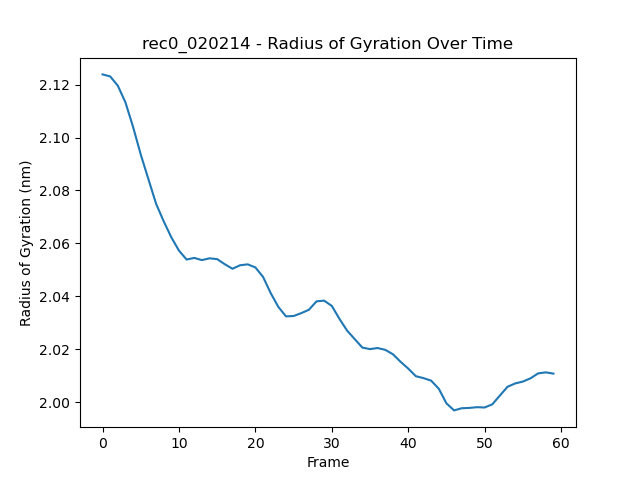

In [5]:
from IPython.display import Image
rgypath = registry.get_mapped_path("fig0_021748") + '.png'
Image(filename=rgypath)

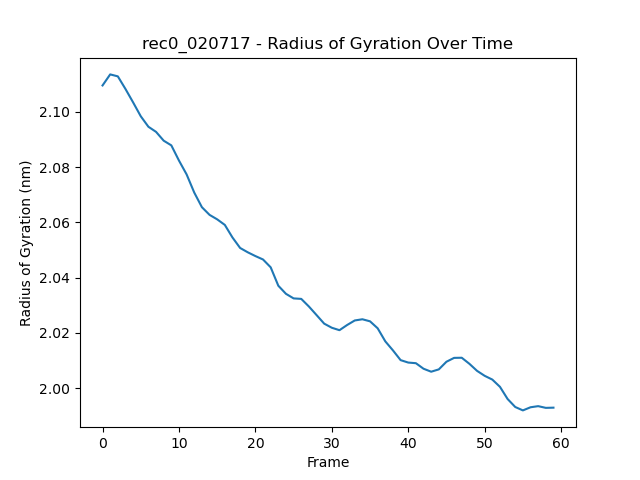

In [6]:
rgypath = registry.get_mapped_path("fig0_021848") + '.png'
Image(filename=rgypath)

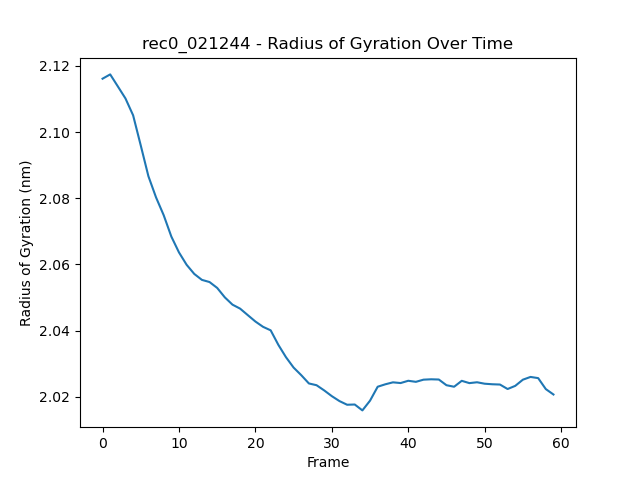

In [7]:
rgypath = registry.get_mapped_path("fig0_021852") + '.png'
Image(filename=rgypath)

In [23]:
import mdtraj as md

#get dssp 
number_of_chains = traj1.n_chains
secondary_structure = md.compute_dssp(traj1,simplified=True)
print("Number of chains: ",number_of_chains)
print("Number of sheets: ",len([i for i in secondary_structure[0] if i == 'E']))
print("Number of helices: ",len([i for i in secondary_structure[0] if i == 'H']))
print("Number of coils: ",len([i for i in secondary_structure[0] if i == 'C']))

Number of chains:  4
Number of sheets:  135
Number of helices:  4
Number of coils:  193


In [24]:
import mdtraj as md

#get dssp 
number_of_chains = traj2.n_chains
secondary_structure = md.compute_dssp(traj1,simplified=True)
print("Number of chains: ",number_of_chains)
print("Number of sheets: ",len([i for i in secondary_structure[0] if i == 'E']))
print("Number of helices: ",len([i for i in secondary_structure[0] if i == 'H']))
print("Number of coils: ",len([i for i in secondary_structure[0] if i == 'C']))

Number of chains:  4
Number of sheets:  135
Number of helices:  4
Number of coils:  193


In [25]:
import mdtraj as md

#get dssp 
number_of_chains = traj3.n_chains
secondary_structure = md.compute_dssp(traj1,simplified=True)
print("Number of chains: ",number_of_chains)
print("Number of sheets: ",len([i for i in secondary_structure[0] if i == 'E']))
print("Number of helices: ",len([i for i in secondary_structure[0] if i == 'H']))
print("Number of coils: ",len([i for i in secondary_structure[0] if i == 'C']))

Number of chains:  4
Number of sheets:  135
Number of helices:  4
Number of coils:  193


In [8]:
#non-descriptive prompt
traj_1 = registry.get_mapped_path("rec0_022418")
top_1 = registry.get_mapped_path("top_sim0_022417")

traj_2 = registry.get_mapped_path("rec0_073921")
top_2 = registry.get_mapped_path("top_sim0_073920")

traj_3 = registry.get_mapped_path("rec0_125653")
top_3 = registry.get_mapped_path("top_sim0_125652")

assert os.path.exists(traj_1)
assert os.path.exists(top_1)
assert os.path.exists(traj_2)
assert os.path.exists(top_2)
assert os.path.exists(traj_3)
assert os.path.exists(top_3)

In [10]:
traj1 = md.load(traj_1, top=top_1)
traj2 = md.load(traj_2, top=top_2)
traj3 = md.load(traj_3, top=top_3)

print("Atoms, Residues, Chains, Frames")
print(traj1.n_atoms,traj1.top.n_residues, traj1.top.n_chains,traj1.n_frames)
print(traj2.n_atoms,traj2.top.n_residues, traj2.top.n_chains,traj2.n_frames)
print(traj3.n_atoms,traj3.top.n_residues, traj3.top.n_chains,traj3.n_frames)

Atoms, Residues, Chains, Frames
5419 439 4 501
5419 439 4 501
5419 439 4 501


In [14]:
rgypath = registry.get_mapped_path("fig0_182335") + '.png'


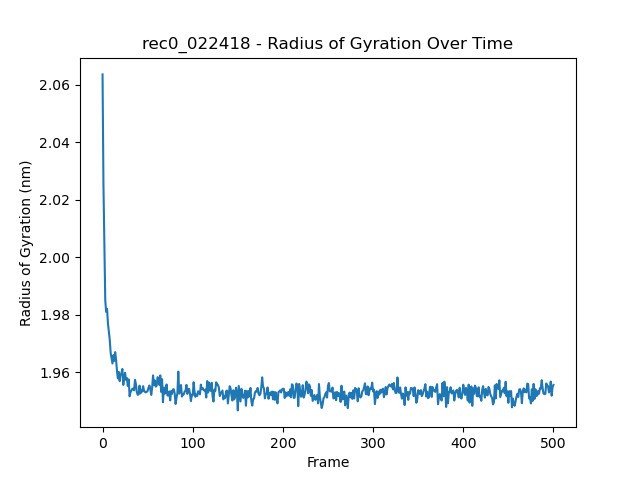

In [15]:
from IPython.display import Image
Image(filename=rgypath)

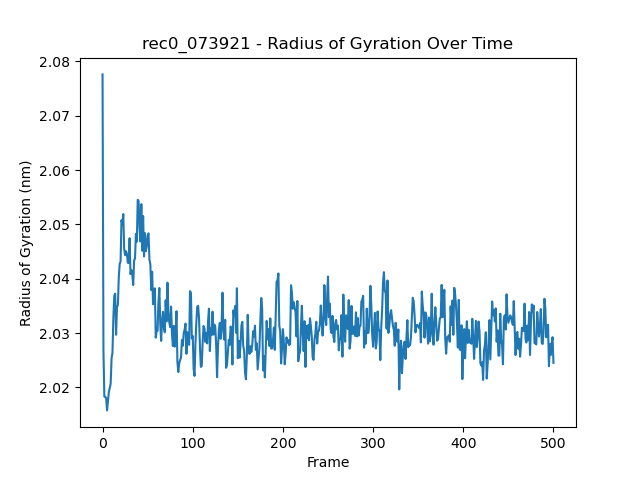

In [17]:
rgypath = registry.get_mapped_path("fig0_182339") + '.png'
Image(filename=rgypath)

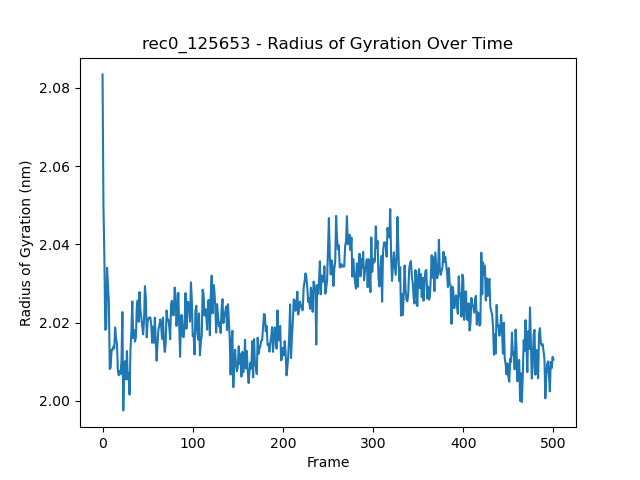

In [18]:
rgypath = registry.get_mapped_path("fig0_182342") + '.png'
Image(filename=rgypath)

In [19]:
import mdtraj as md

#get dssp 
number_of_chains = traj1.n_chains
secondary_structure = md.compute_dssp(traj1,simplified=True)
print("Number of chains: ",number_of_chains)
print("Number of sheets: ",len([i for i in secondary_structure[0] if i == 'E']))
print("Number of helices: ",len([i for i in secondary_structure[0] if i == 'H']))
print("Number of coils: ",len([i for i in secondary_structure[0] if i == 'C']))

Number of chains:  4
Number of sheets:  135
Number of helices:  4
Number of coils:  193


In [20]:
number_of_chains = traj2.n_chains
secondary_structure = md.compute_dssp(traj2,simplified=True)
print("Number of chains: ",number_of_chains)
print("Number of sheets: ",len([i for i in secondary_structure[0] if i == 'E']))
print("Number of helices: ",len([i for i in secondary_structure[0] if i == 'H']))
print("Number of coils: ",len([i for i in secondary_structure[0] if i == 'C']))



Number of chains:  4
Number of sheets:  128
Number of helices:  3
Number of coils:  201


In [21]:
number_of_chains = traj3.n_chains
secondary_structure = md.compute_dssp(traj3,simplified=True)
print("Number of chains: ",number_of_chains)
print("Number of sheets: ",len([i for i in secondary_structure[0] if i == 'E']))
print("Number of helices: ",len([i for i in secondary_structure[0] if i == 'H']))
print("Number of coils: ",len([i for i in secondary_structure[0] if i == 'C']))


Number of chains:  4
Number of sheets:  131
Number of helices:  3
Number of coils:  198
